## Travellers data analysis

## Helper Libraries

In [235]:
import numpy as np
import pandas as pd
from plotnine import *
from scipy.stats import uniform
from scipy.stats import randint
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import warnings
import math

## Modeling packages

In [236]:
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.inspection import partial_dependence
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import train_test_split, KFold, RepeatedKFold, cross_val_score
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, roc_auc_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_selector as selector
from sklearn.linear_model import Ridge, Lasso, ElasticNet

## EDA

In [237]:
df = pd.read_csv('../data/final_data.csv')
df2 = pd.read_csv('../data/cleaned_data.csv')


In [238]:
df2.shape

(10462, 16)

In [239]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10462 entries, 0 to 10461
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10462 non-null  object
 1   Date_of_Journey  10462 non-null  object
 2   Source           10462 non-null  object
 3   Destination      10462 non-null  object
 4   Route            10462 non-null  object
 5   Dep_Time         10462 non-null  object
 6   Arrival_Time     10462 non-null  object
 7   Duration         10462 non-null  object
 8   Total_Stops      10462 non-null  int64 
 9   Additional_Info  10462 non-null  object
 10  Price            10462 non-null  int64 
 11  year             10462 non-null  int64 
 12  month            10462 non-null  int64 
 13  Day              10462 non-null  int64 
 14  flight_time      10462 non-null  object
 15  Duration(sec)    10462 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 1.3+ MB


In [240]:
df2.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year,month,Day,flight_time,Duration(sec)
0,Air India,01/03/2019,Banglore,New Delhi,BLR → BOM → AMD → DEL,08:50,23:55 02 Mar,39h 5m,2,No info,17135,2019,1,3,morning,140700
1,Air India,01/03/2019,Banglore,New Delhi,BLR → MAA → DEL,11:50,08:55 02 Mar,21h 5m,1,1 Long layover,14594,2019,1,3,morning,75900
2,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,14:05,07:40 02 Mar,17h 35m,1,1 Long layover,22270,2019,1,3,afternoon,63300


In [241]:
df2.groupby('Airline').describe()["Price"]

,count,mean,std,min,25%,50%,75%,max
Airline,,,,,,,,
Air Asia,319.0,5590.260188,2027.362290,3383.0,4282.00,5162.0,6451.00,13774.0
Air India,1694.0,9556.608028,3937.875634,2050.0,6597.75,9316.0,12199.00,31945.0
Another,4.0,7756.750000,3388.232221,4140.0,5511.75,7547.0,9792.00,11793.0
GoAir,194.0,5861.056701,2703.585767,3398.0,3898.00,5135.0,6811.25,22794.0
IndiGo,2043.0,5668.469897,2266.933697,2227.0,4226.00,5000.0,6493.00,22153.0
Jet Airways,3700.0,11599.021081,4315.671402,1840.0,8586.00,11134.0,14151.00,54826.0
Jet Airways Business,6.0,58358.666667,11667.596748,46490.0,52243.00,54747.0,61122.50,79512.0
Multiple carriers,1196.0,10902.678094,3721.234997,5797.0,7723.00,10197.0,13587.00,36983.0
Multiple carriers Premium economy,13.0,11418.846154,1717.153936,9845.0,10161.00,11269.0,11269.00,14629.0


In [242]:
df2.groupby(['Airline','Total_Stops']).describe()["Price"]

count          mean  \
Airline                           Total_Stops                         
Air Asia                          0             181.0   4492.331492   
                                  1             129.0   7078.325581   
                                  2               9.0   6341.888889   
Air India                         0             416.0   5600.552885   
                                  1             540.0   9041.509259   
                                  2             702.0  12146.860399   
                                  3              35.0  12339.057143   
                                  4               1.0  17686.000000   
Another                           0               3.0   8962.333333   
                                  1               1.0   4140.000000   
GoAir                             0              92.0   4726.173913   
                                  1             102.0   6884.676471   
IndiGo                            0            1231.0   4714.865963   
                                  1             793.0   7104.717528   
                                  2              19.0   7507.526316   
Jet Airways                       0             622.0   6173.384244   
                                  1            2535.0  12512.741223   
                                  2             543.0  13548.313076   
Jet Airways Business              1               4.0  62844.250000   
                                  2               2.0  49387.500000   
Multiple carriers                 1            1145.0  10711.316157   
                                  2              43.0  14809.395349   
                                  3               8.0  17292.750000   
Multiple carriers Premium economy 1              13.0  11418.846154   
SpiceJet                          0             667.0   3800.041979   
                                  1             148.0   6750.560811   
Vistara                           0             263.0   6297.342205   
                                  1             215.0   9641.148837   

                                                        std      min  \
Airline                           Total_Stops                          
Air Asia                          0             1161.582527   3383.0   
                                  1             2016.969436   5162.0   
                                  2             2077.505021   5192.0   
Air India                         0             2894.814434   2050.0   
                                  1             3189.027585   4227.0   
                                  2             2786.954353   4647.0   
                                  3             2087.971517   8607.0   
                                  4                     NaN  17686.0   
Another                           0             2915.405518   5969.0   
                                  1                     NaN   4140.0   
GoAir                             0             2207.445516   3398.0   
                                  1             2710.295330   3673.0   
IndiGo                            0             1574.946498   2227.0   
                                  1             2408.049804   3480.0   
                                  2             1307.882826   6103.0   
Jet Airways                       0             1893.126119   1840.0   
                                  1             3957.631660   4757.0   
                                  2             2877.843256   6643.0   
Jet Airways Business              1            11866.304715  52229.0   
                                  2             4097.683797  46490.0   
Multiple carriers                 1             3426.743914   5797.0   
                                  2             6958.685988   5935.0   
                                  3             2821.046855  15419.0   
Multiple carriers Premium economy 1             1717.153936   9845.0   
SpiceJet                          0          

In [243]:
# q1- who sold most tickets?
df2['Airline'].value_counts()

Jet Airways                          3700
IndiGo                               2043
Air India                            1694
Multiple carriers                    1196
SpiceJet                              815
Vistara                               478
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Another                                 4
Name: Airline, dtype: int64

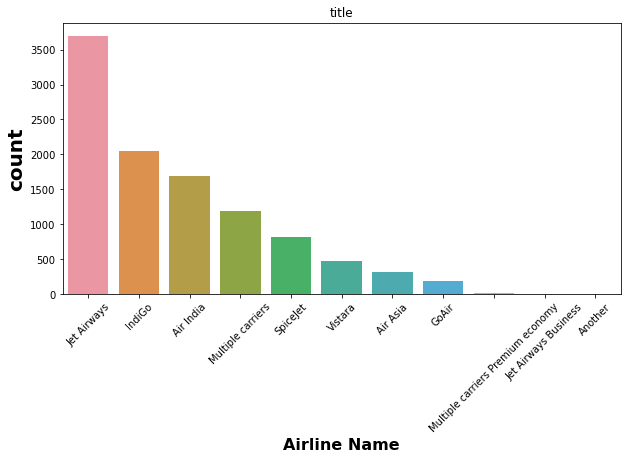

In [244]:
# q1- (chart)WHICH AIRLINE HAS MOST FLIGHTS 
plt.subplots(figsize=(10,5))
sns.countplot(x="Airline", data=df2, order = df2['Airline'].value_counts().index)
plt.title("title")#, weight="bold",fontsize=20, pad=20)
plt.ylabel("count", weight="bold", fontsize=20)
plt.xlabel("Airline Name", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.show()

In [245]:
#so most flight have one stop and its through jet airways so that would explain why it has the highest value
#but did the majority of jet airways guests take the 1 stop flights or is it an outlier?


# q2 how many of jet airways guests took 1 stop flights 
df2['Total_Stops'].value_counts()

1    5625
0    3475
2    1318
3      43
4       1
Name: Total_Stops, dtype: int64

In [246]:
fig = px.histogram(df2, x='Airline',
             color='Total_Stops', barmode='group',
             
             title='title',
             labels={'',
                     '',
                     ''
                     })
fig.update_layout(yaxis_title='Number of flights')
fig.show()

In [247]:
# q3 why is one stop the most spent ? is it its price or is it that its that its cheap and a lot of poeple go for it?


question_3 = df2.groupby(['Total_Stops', 'Airline']).describe()['Price']
question_3.drop(question_3.columns[[2,3,4,6]], axis=1, inplace=True)
question_3

count          mean      50%  \
Total_Stops Airline                                                            
0           Air Asia                            181.0   4492.331492   4384.0   
            Air India                           416.0   5600.552885   5228.0   
            Another                               3.0   8962.333333   9125.0   
            GoAir                                92.0   4726.173913   3898.0   
            IndiGo                             1231.0   4714.865963   4752.0   
            Jet Airways                         622.0   6173.384244   6144.0   
            SpiceJet                            667.0   3800.041979   3841.0   
            Vistara                             263.0   6297.342205   5403.0   
1           Air Asia                            129.0   7078.325581   6451.0   
            Air India                           540.0   9041.509259   8372.0   
            Another                               1.0   4140.000000   4140.0   
            GoAir                               102.0   6884.676471   6286.0   
            IndiGo                              793.0   7104.717528   6442.0   
            Jet Airways                        2535.0  12512.741223  12373.0   
            Jet Airways Business                  4.0  62844.250000  59818.0   
            Multiple carriers                  1145.0  10711.316157   9871.0   
            Multiple carriers Premium economy    13.0  11418.846154  11269.0   
            SpiceJet                            148.0   6750.560811   5937.0   
            Vistara                             215.0   9641.148837   9187.0   
2           Air Asia                              9.0   6341.888889   5192.0   
            Air India                           702.0  12146.860399  11989.0   
            IndiGo                               19.0   7507.526316   6610.0   
            Jet Airways                         543.0  13548.313076  13292.0   
            Jet Airways Business                  2.0  49387.500000  49387.5   
            Multiple carriers                    43.0  14809.395349  15965.0   
3           Air India                            35.0  12339.057143  12358.0   
            Multiple carriers                     8.0  17292.750000  15961.5   
4           Air India                             1.0  17686.000000  17686.0   

                                                   max  
Total_Stops Airline                                     
0           Air Asia                           10873.0  
            Air India                          31945.0  
            Another                            11793.0  
            GoAir                              18558.0  
            IndiGo                             19685.0  
            Jet Airways                        18308.0  
            SpiceJet                           12475.0  
            Vistara                            21730.0  
1           Air Asia                           13774.0  
            Air India                          28322.0  
            Another                             4140.0  
            GoAir                              22794.0  
            IndiGo                             22153.0  
            Jet Airways                        54826.0  
            Jet Airways Business               79512.0  
            Multiple carriers                  36983.0  
            Multiple carriers Premium economy  14629.0  
            SpiceJet                           23267.0  
            Vistara                            18387.0  
2           Air Asia                           11245.0  
            Air India                          31783.0  
            IndiGo                             10278.0  
            Jet Airways                        24210.0  
            Jet Airways Business               52285.0  
            Multiple carriers                  34608.0  
3           Air India                          18293.0  
            Multiple carriers                  2182

In [248]:
#q4 do the diffrent types of additional info change the price?
df2['Additional_Info'].unique()

array(['No info', '1 Long layover', 'Business class', 'Red-eye flight',
       'Change airports', '2 Long layover', '1 Short layover',
       'In-flight meal not included', 'No check-in baggage included'],
      dtype=object)

Text(0, 0.5, 'ticket price')

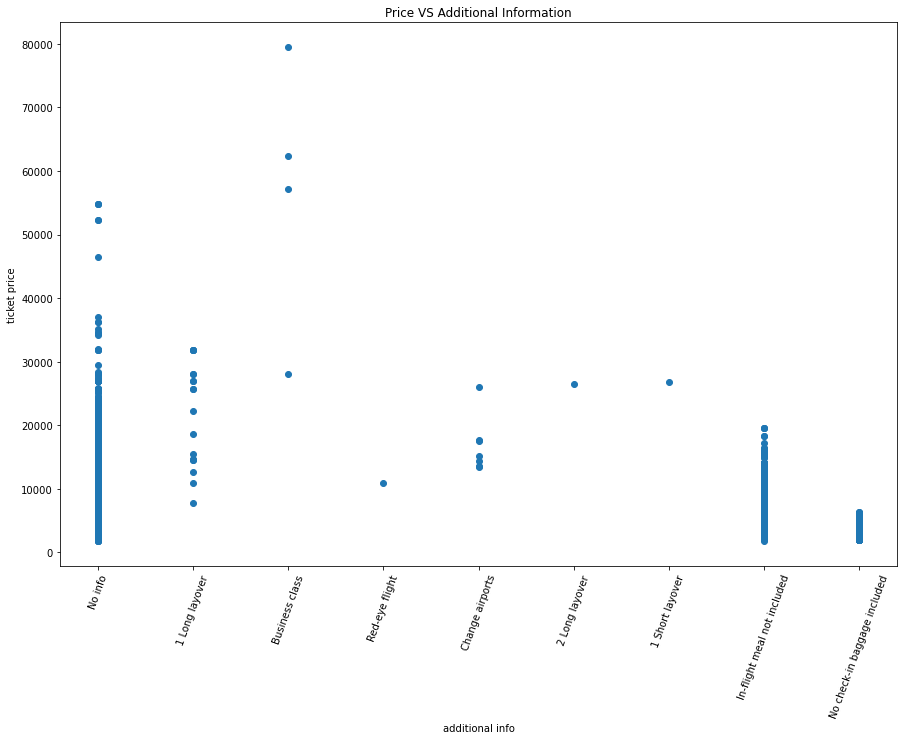

In [249]:
plt.figure(figsize = (15, 10))
plt.title('Price VS Additional Information')
plt.scatter(df2['Additional_Info'], df2['Price'])
plt.xticks(rotation = 70)
plt.xlabel('additional info')#,weight="bold",fontsize=10, pad=20)
plt.ylabel('ticket price')#,weight="bold",fontsize=10, pad=2)

In [250]:
X_train, X_test, y_train, y_test = train_test_split(df2.drop("Price", axis=1), df2["Price"])

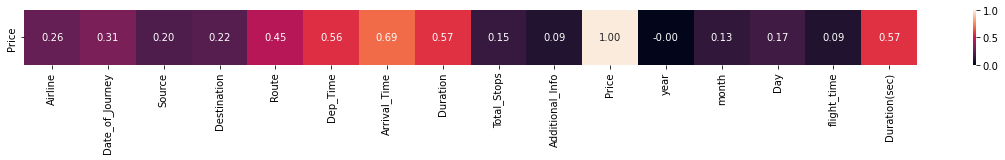

In [251]:
import math #mathematical functions
import scipy.stats as ss #math operations
from collections import Counter
def conditional_entropy(x,y):
    # entropy of x given y
    y_counter = Counter(y)
    xy_counter = Counter(list(zip(x,y)))
    total_occurrences = sum(y_counter.values())
    entropy = 0
    for xy in xy_counter.keys():
        p_xy = xy_counter[xy] / total_occurrences
        p_y = y_counter[xy[1]] / total_occurrences
        entropy += p_xy * math.log(p_y/p_xy)
    return entropy


def theil_u(x,y):
    s_xy = conditional_entropy(x,y)
    x_counter = Counter(x)
    total_occurrences = sum(x_counter.values())
    p_x = list(map(lambda n: n/total_occurrences, x_counter.values()))
    s_x = ss.entropy(p_x)
    if s_x == 0:
        return 1
    else:
        return (s_x - s_xy) / s_x   
#correlation viz
theilu = pd.DataFrame(index=['Price'])
columns = df2.columns
for j in range(0,len(columns)):
    u = theil_u(df2['Price'].tolist(),df2[columns[j]].tolist())
    theilu.loc[:,columns[j]] = u
theilu.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(20,1))
sns.heatmap(theilu,annot=True,fmt='.2f')
plt.show()

In [252]:
warnings.filterwarnings("ignore")

In [253]:
# create train/test split
train, test = train_test_split(df, train_size=0.7)

# get predictors and response varaibles for each set 
X_train = train.drop(["Price","year"], axis=1)
y_train = train[["Price"]]
X_test = test.drop(["Price","year"], axis=1)
y_test = test[["Price"]]


In [254]:
# Step 2: standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Step 3: create model object
en_mod = ElasticNet(alpha=1)

# Step 4: fit/train model
en_fit = en_mod.fit(X_train_scaled, y_train)

In [255]:
en_fit.coef_

array([ 9.78679525e+02, -1.06225400e+02, -4.43557413e+02,  4.65221023e+02,
       -3.09563133e+02, -1.88440774e+02, -1.10760462e+01, -2.37817244e+02,
       -6.70633115e+02,  9.71131372e+02,  5.77754236e+02,  2.54096980e+02,
        3.55951181e+01, -4.42585647e+02, -8.10120246e+01,  5.61942544e+00,
       -8.19054009e+01,  1.35169012e+02,  6.87757085e-01, -2.20837575e+02,
        6.81905004e-01,  1.35170423e+02, -3.81830933e+02, -2.20840524e+02,
       -8.18965824e+01,  4.52042672e+02,  3.16501933e+02,  1.14275625e+02,
        1.06984837e+02,  3.94286487e+02,  4.89400510e+01, -3.85784769e+02,
       -8.67818049e+01,  3.38125326e+02,  2.85149125e+01,  4.27905928e+01,
        7.32583970e+00, -5.73599808e+01, -9.13239411e+00])

In [256]:
pred = en_fit.predict(X_train)

In [257]:
# compute RMSE
lossfunc = 'neg_root_mean_squared_error'

In [258]:
kfold = KFold(n_splits=5, random_state=123, shuffle=True)

# Create grid of hyperparameter values
hyper_grid = {'alpha': 10**np.linspace(10, -5, 50)*0.5}

In [259]:
grid_search = GridSearchCV(en_mod, hyper_grid, cv=kfold, scoring=lossfunc)
results = grid_search.fit(X_train, y_train)

# Optimal penalty parameter in grid search
results.best_estimator_

ElasticNet(alpha=2.0474575311902096e-05)

In [260]:
# Best model's cross validated RMSE
round(abs(results.best_score_), 2)

2637.82

## Multiple Linear Regression

In [261]:
df = pd.read_csv('../data/final_data.csv')
# create train/test split
train, test = train_test_split(df, train_size=0.7)
# get predictors and response varaibles for each set 
X_train = train.drop(["Price","year"], axis=1)
y_train = train[["Price"]]
X_test = test.drop(["Price","year"], axis=1)
y_test = test[["Price"]]

In [262]:
# Multiple linear regression with kfold repeat (10 folds, 5 repeats)
# define loss function
lossFn = 'neg_root_mean_squared_error'

# create 10 fold CV object
rfk = RepeatedKFold(n_splits=10, n_repeats=5)

# create LM model object
lm_mod = linear_model.LinearRegression()
lm_fit = lm_mod.fit(X_train, y_train)

# execute and score the cross validation procedure
results = cross_val_score(
    estimator=lm_mod,
    X=X_train,
    y=y_train,
    cv=rfk,
    scoring=lossFn
)
print(results.mean())
print(lm_fit.coef_)

-2623.766226019798
[[ 2.55856691e+03 -7.76323949e+01 -6.80538682e+01  2.61807211e-03
  -5.36968520e+03 -3.76112684e+03 -1.39500181e+03 -5.34728899e+03
  -5.12602214e+03  6.86397891e+02  3.23488935e+04 -1.61387900e+03
  -1.50465599e+03 -5.63381208e+03 -3.28381930e+03  4.46418320e+02
   3.78158302e+01  2.14354559e+02  7.52797171e+01 -7.73868426e+02
   7.52797171e+01  2.14354559e+02 -1.30098712e+03 -7.73868426e+02
   3.78158302e+01  1.74740544e+03  1.16414725e+03  7.34826997e+03
   6.97138384e+03  7.02221537e+03 -1.84592218e+03 -8.61673103e+03
  -5.25818357e+03 -5.04561040e+03 -1.73956924e+03  1.87847773e+02
   1.83306968e+01 -1.69447890e+02 -3.67305803e+01]]


## K-nearest Neighbors Algorithm

3192.3494975680387
9


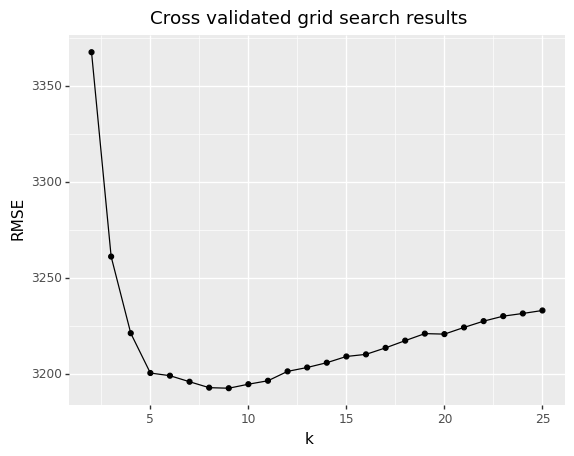

<ggplot: (8764988156748)>

In [263]:
# K nearest neighbor
# basic model object
knn = KNeighborsRegressor()

# Create grid of hyperparameter values
hyper_grid = {'n_neighbors': range(2, 26)}

# Tune a knn model using grid search
grid_search = GridSearchCV(knn, hyper_grid, cv=rfk, scoring=lossFn)
results = grid_search.fit(X_train, y_train)

# Best model's cross validated RMSE
print(abs(results.best_score_))

# Best model's k value
print(results.best_estimator_.get_params().get('n_neighbors'))
# Plot all RMSE results
all_rmse = pd.DataFrame({'k': range(2, 26), 
                         'RMSE': np.abs(results.cv_results_['mean_test_score'])})

(ggplot(all_rmse, aes(x='k', y='RMSE'))
 + geom_line()
 + geom_point()
 + ggtitle("Cross validated grid search results"))

## Random Forests

In [264]:
travellers = pd.read_csv('../data/final_data.csv')

train, test = train_test_split(travellers, train_size=0.7, random_state=123)

X_train = train.drop(['Price', 'year'], axis=1)
y_train = train[['Price']]
X_test = test.drop(['Price', 'year'], axis=1)
y_test = test[['Price']]

In [265]:
# create pre-processing pipeline
preprocessor = ColumnTransformer(
  remainder="passthrough",
  transformers=[
    ("scale", StandardScaler(), selector(dtype_include="number")),
    ("one-hot", OneHotEncoder(), selector(dtype_include="object"))
  ])

In [266]:
rf_mod = RandomForestRegressor()

# create modeling pipeline
model_pipeline = Pipeline(steps=[
  ("preprocessor", preprocessor),
  ("rf_mod", rf_mod),
])

# define loss function
loss = 'neg_root_mean_squared_error'

# create 5 fold CV object
kfold = KFold(n_splits=5, random_state=123, shuffle=True)

# fit model with 5-fold CV
results = cross_val_score(model_pipeline, X_train, y_train.values.ravel(), cv=kfold, scoring=loss)

In [267]:
np.abs(np.mean(results))

1760.894893737423

In [268]:
%%capture

rf_mod = RandomForestRegressor()


# Create grid of hyperparameter values
hyper_grid = {
  'rf_mod__max_features': [.05, .15, .25, .333, .4, .5, .6],
  'rf_mod__min_samples_leaf': [1, 3, 5, 10, 15, 20],
  'rf_mod__bootstrap': [True, False],
  'rf_mod__max_samples': [.5, .63, .8]
  }
  
# Tune a knn model using grid search
grid_search = GridSearchCV(model_pipeline, hyper_grid, cv=kfold, scoring=loss, n_jobs=-1)
results = grid_search.fit(X_train, y_train.values.ravel())

In [269]:
np.abs(results.best_score_)

1712.5875325589036

In [270]:
results.best_params_

{'rf_mod__bootstrap': True,
 'rf_mod__max_features': 0.6,
 'rf_mod__max_samples': 0.63,
 'rf_mod__min_samples_leaf': 1}

In [271]:
%%capture

# Create grid of hyperparameter values
hyper_distributions = {
  'rf_mod__max_features': uniform(.05, .35),
  'rf_mod__min_samples_leaf': randint(1, 9),
  'rf_mod__bootstrap': [True, False],
  'rf_mod__max_samples': uniform(.5, .3)
  }
  
# Tune a knn model using grid search
random_search = RandomizedSearchCV(
  model_pipeline, 
  param_distributions=hyper_distributions, 
  n_iter=20,
  cv=kfold, 
  scoring=loss, 
  n_jobs=-1, 
  random_state=13
  )
random_search_results = random_search.fit(X_train, y_train.values.ravel())

In [272]:
np.abs(random_search_results.best_score_)

1738.3699201393495

In [273]:
random_search_results.best_params_

{'rf_mod__bootstrap': True,
 'rf_mod__max_features': 0.37868729205270835,
 'rf_mod__max_samples': 0.6615164397309103,
 'rf_mod__min_samples_leaf': 1}

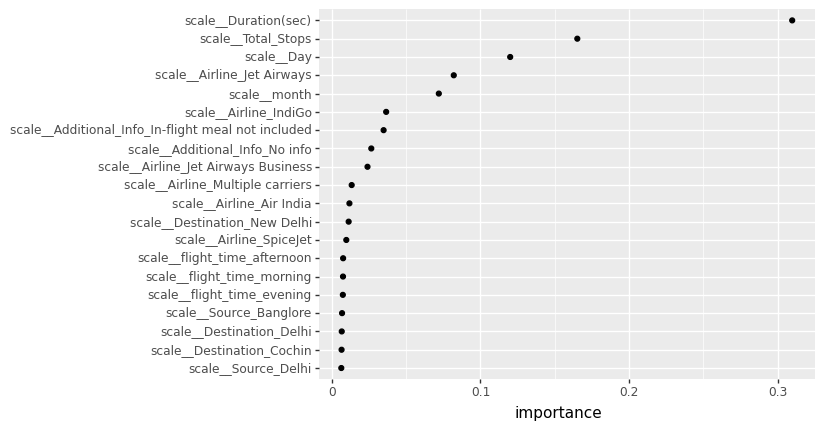

<ggplot: (8764989727567)>

In [274]:
X_encoded = preprocessor.fit_transform(X_train)
final_model = RandomForestRegressor(
  n_estimators=1000,
  max_features=random_search_results.best_params_['rf_mod__max_features'],
  max_samples=random_search_results.best_params_['rf_mod__max_samples'],
  min_samples_leaf=random_search_results.best_params_['rf_mod__min_samples_leaf'],
  bootstrap=random_search_results.best_params_['rf_mod__bootstrap']
)
final_model_fit = final_model.fit(X_encoded, y_train.values.ravel())

# extract feature importances
vi = pd.DataFrame({'feature': preprocessor.get_feature_names_out(),
                   'importance': final_model_fit.feature_importances_})

# get top 20 influential features
top_20_features = vi.nlargest(20, 'importance')

# plot feature importance
(ggplot(top_20_features, aes(x='importance', y='reorder(feature, importance)'))
 + geom_point()
 + labs(y=None))

## Gradient Boosting

In [275]:
# GBM, part 1 basic GBM to get optimal hyperparameters
# create GBM estimator
xgb_mod = xgb.XGBRegressor()

# create 5 fold CV object
kfold = KFold(n_splits=5, shuffle=True)

# create pre-processing pipeline
preprocessor = ColumnTransformer(
  remainder="passthrough",
  transformers=[
    ("scale", StandardScaler(), selector(dtype_include="number")),
    ("one-hot", OneHotEncoder(), selector(dtype_include="object"))
  ])

# create modeling pipeline
model_pipeline = Pipeline(steps=[
  ("preprocessor", preprocessor),
  ("xgb_mod", xgb_mod),
])

# define hyperparameters
hyper_grid = {
  'xgb_mod__n_estimators': [i for i in range(100,3001,100)],
  'xgb_mod__learning_rate': [0.001, 0.01, 0.1],
  'xgb_mod__max_depth': [i for i in range(1,41,2)],
  'xgb_mod__min_child_weight': [i for i in range(1,41,4)]
}

# create random search object
random_search = RandomizedSearchCV(
    model_pipeline, 
    param_distributions=hyper_grid, 
    n_iter=20, 
    cv=kfold, 
    scoring=lossFn, 
    n_jobs=-1, 
    random_state=13
)

# execute random search
random_search_results = random_search.fit(X_train, y_train)

# best model score
print(np.abs(random_search_results.best_score_))

# best hyperparameter values
print(random_search_results.best_params_)

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.

The exit codes of the workers are {SIGKILL(-9)}

In [ ]:
# GBM, part 2 stochastic GBM using optimal hyperparameters
# create GBM estimator with previous parameter settings
xgb_mod = xgb.XGBRegressor(
    n_estimators=random_search_results.best_params_['xgb_mod__n_estimators'],
    learning_rate=random_search_results.best_params_['xgb_mod__learning_rate'],
    max_depth=random_search_results.best_params_['xgb_mod__max_depth'],
    min_child_weight=random_search_results.best_params_['xgb_mod__min_child_weight']
)

# create modeling pipeline
model_pipeline = Pipeline(steps=[
  ("preprocessor", preprocessor),
  ("xgb_mod", xgb_mod),
])

# define stochastic hyperparameters
stochastic_hyper_grid = {
  'xgb_mod__subsample': [0.5, 0.75, 1],
  'xgb_mod__colsample_bytree': [0.5, 0.75, 1],
  'xgb_mod__colsample_bylevel': [0.5, 0.75, 1],
  'xgb_mod__colsample_bynode': [0.5, 0.75, 1]
}

stochastic_random_search = RandomizedSearchCV(
    model_pipeline, 
    param_distributions=stochastic_hyper_grid, 
    n_iter=20, 
    cv=kfold, 
    scoring=lossFn, 
    n_jobs=-1, 
    random_state=13
)

# execute random search
stochastic_random_search_results = stochastic_random_search.fit(X_train, y_train)

# best model score
print(np.abs(stochastic_random_search_results.best_score_))

# best hyperparameter values
print(stochastic_random_search_results.best_params_)

In [ ]:
# feature interpetations of final model
# preprocess training data
X_encoded = preprocessor.fit_transform(X_train)

# create final model object
final_model = xgb.XGBRegressor(
    n_estimators=random_search_results.best_params_['xgb_mod__n_estimators'],
    learning_rate=random_search_results.best_params_['xgb_mod__learning_rate'],
    max_depth=random_search_results.best_params_['xgb_mod__max_depth'],
    min_child_weight=random_search_results.best_params_['xgb_mod__min_child_weight'],
    subsample=stochastic_random_search_results.best_params_['xgb_mod__subsample'],
    colsample_bytree=stochastic_random_search_results.best_params_['xgb_mod__colsample_bytree'],
    colsample_bylevel=stochastic_random_search_results.best_params_['xgb_mod__colsample_bylevel'],
    colsample_bynode=stochastic_random_search_results.best_params_['xgb_mod__colsample_bynode']
)

final_model_fit = final_model.fit(X_encoded, y_train)

# extract feature importances
vi = pd.DataFrame({'feature': preprocessor.get_feature_names_out(),
                   'importance': final_model_fit.feature_importances_})

# get top 20 influential features
top_20_features = vi.nlargest(20, 'importance')

# plot feature importance
(ggplot(top_20_features, aes(x='importance', y='reorder(feature, importance)'))
 + geom_point()
 + labs(y=None))

## 

In [ ]:
# Finally, Run test set features on the model and graph target predictions on top of actual values
# Transform Test set features 
X_test_encoded = preprocessor.transform(X_test)

# Run final model on transformed X
y_predicted = final_model_fit.predict(X_test_encoded)
ovservations = np.arange(1,3140)

# Plot target predicted and actual values
trace1 = go.Scatter(
    x=ovservations,
    y=y_predicted,
    name='target prediction',
    marker=dict(
        color='rgb(0,0,204)'
               )
)
trace2 = go.Scatter(
    x=ovservations,
    y=y_test.values.ravel(),
    name='target actual',
    marker=dict(
        color='rgb(204,0,0)'
               )
)
fig = go.Figure()
fig.add_traces([trace2,trace1])
fig.update_layout(title = 'Final Model Target Prediction & Actual', yaxis={'title':'Price of Ticket (Rupee)'}, xaxis={'title':'Flight Observation Number'})
fig.show()

# Print RMSE
print("Root mean squared error: ", math.sqrt(mean_squared_error(y_test.values.ravel(), y_predicted)))